<a id=top-page></a>
# 📄 Results for the Burke-Schumann (BS) dataset

This notebook loads the Burke-Schumann (BS) dataset for combustion of methane in air and produces results for the paper shown in $\S4.1$.

- [**Load the dataset**](#load-data)
- [**Plot the BS dataset VQPCA clustering**](#BS-VQPCA)
- [**Visualize the VQPCA clustering solutions with increasing number of clusters**](#BS-VQPCA-k)
    - [**Check for Auto scaling with the dataset $\mathbf{X} = [T, Y_i]$**](#BS-VQPCA-k-Auto)
    - [**Check for Pareto scaling with the dataset $\mathbf{X} = [Y_i]$**](#BS-VQPCA-k-Pareto)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
idx0name = 'idx0mf'
scaling = 'auto'
n_components = 1

<a id=load-data></a>
***

## Load the dataset

[Go to the top](#top-page)

In [3]:
BS_state_space = pd.read_csv('../data/BS-X.csv', sep = ',', header=None).to_numpy()
BS_Z = pd.read_csv('../data/BS-Z.csv', sep = ',', header=None).to_numpy().ravel()
BS_names = pd.read_csv('../data/BS-names.csv', sep = ',', header=None).to_numpy().ravel()
Z_stoich = 0.0554

<a id=BS-VQPCA></a>
***

## Plot the BS dataset VQPCA clustering

[Go to the top](#top-page)

In [4]:
idx_filename = 'idx-BS-VQPCA-' + idx0name + '-scaling-' + scaling + '-q' + str(n_components) + '-k8'
idx_BS = pd.read_csv('../results/idx-BS/' + idx_filename + '.csv', sep = ',', header=None).to_numpy().ravel()-1
idx_BS = preprocess.flip_clusters(idx_BS, {0:1, 1:0})

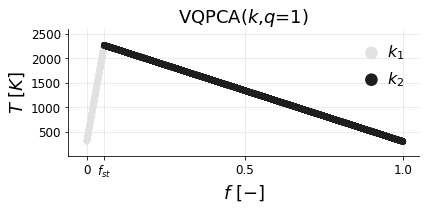

In [5]:
colors_k2 = ['#1e1e1e', '#e1e1e1']
ticks = [0,Z_stoich,0.5,1.0]
dic = { Z_stoich : "$f_{st}$"}
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]
figure = plt.figure(figsize=(6, 3))
spec = figure.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
figure_a = figure.add_subplot(spec[0,0])
scat_a = figure_a.scatter(BS_Z[idx_BS==1], BS_state_space[idx_BS==1,0], color=colors_k2[1], marker='o', s=40, edgecolor='none', alpha=1, zorder=5, label='$k_1$')
scat_a = figure_a.scatter(BS_Z[idx_BS==0], BS_state_space[idx_BS==0,0], color=colors_k2[0], marker='o', s=40, edgecolor='none', alpha=1, zorder=5, label='$k_2$')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel('$f$ [$-$]', fontsize=18)
plt.ylabel('$T$ [$K$]', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, zorder=4)
plt.ylim([0, 2600])
plt.xticks([0,Z_stoich,0.5,1])
figure_a.set_xticklabels(labels)
plt.yticks([500,1000,1500,2000,2500])
plt.title('VQPCA($k$,$q$=1)', fontsize=18)
plt.legend(loc='upper right', frameon=False, ncol=1, fontsize=16, markerscale=2, handletextpad=0)
figure.tight_layout(pad=1)
plt.savefig('../figures/BS-VQPCA.pdf', dpi = 100, bbox_inches='tight')

<a id=BS-VQPCA-k></a>
***
## Visualize the VQPCA clustering solutions with increasing number of clusters

[Go to the top](#top-page)

Below, we check that the VQPCA clustering solution degenerates to two clusters, no matter how many clusters were originally requested by the user.


<a id=BS-VQPCA-k-Auto></a>
### Check for Auto scaling with the dataset $\mathbf{X} = [T, Y_i]$

[Go to the top](#top-page)

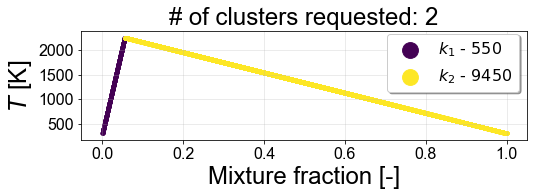

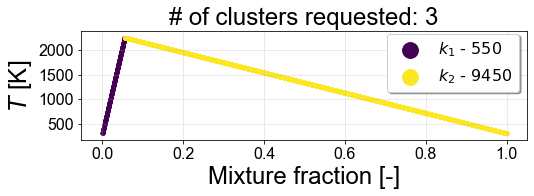

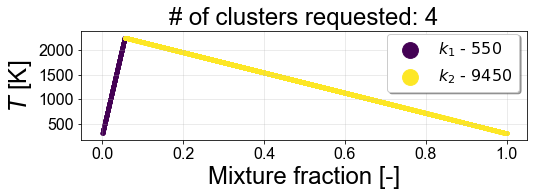

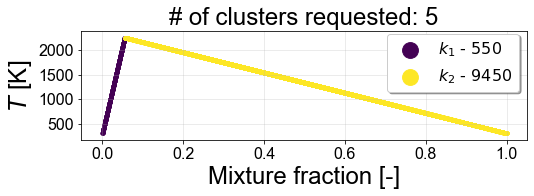

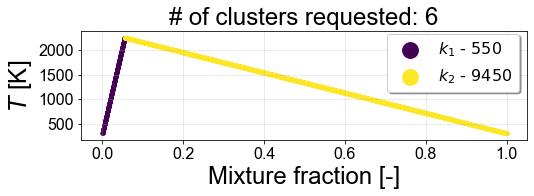

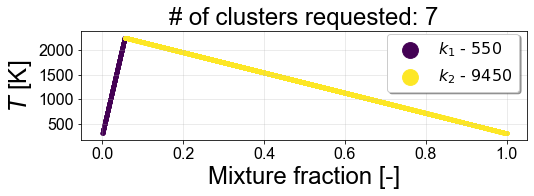

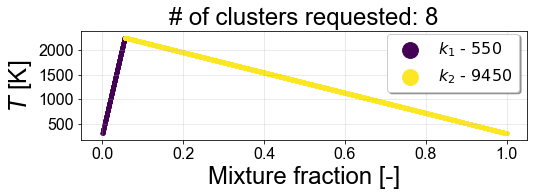

In [6]:
for n_clusters in range(2,9):

    idx_filename = 'idx-BS-VQPCA-' + idx0name + '-scaling-auto-q' + str(n_components) + '-k' + str(n_clusters)
    BS_idx = pd.read_csv('../results/idx-BS/' + idx_filename + '.csv', sep = ',', header=None).to_numpy().ravel()-1
    
    plt_BS = preprocess.plot_2d_clustering(BS_Z,
                                           BS_state_space[:,0],
                                           BS_idx,
                                           x_label='Mixture fraction [-]',
                                           y_label='$T$ [K]',
                                           color_map='viridis',
                                           first_cluster_index_zero=False,
                                           grid_on=True,
                                           title='# of clusters requested: ' + str(n_clusters),
                                           figure_size=(8,2))

<a id=BS-VQPCA-k-Pareto></a>

### Check for Pareto scaling with the dataset $\mathbf{X} = [Y_i]$

[Go to the top](#top-page)

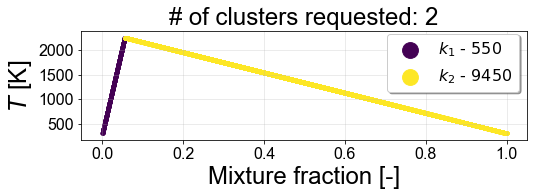

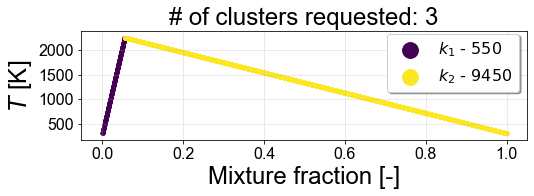

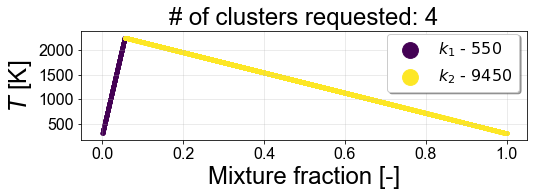

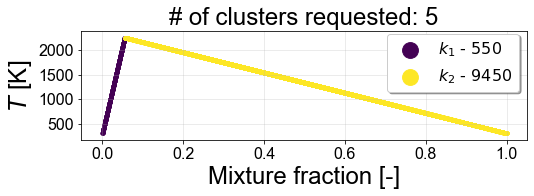

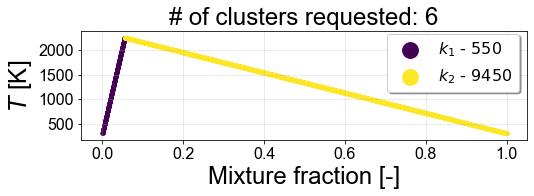

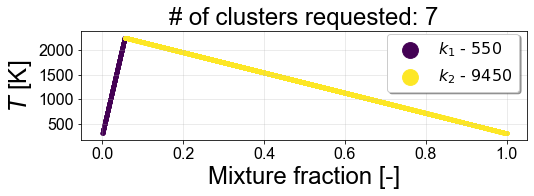

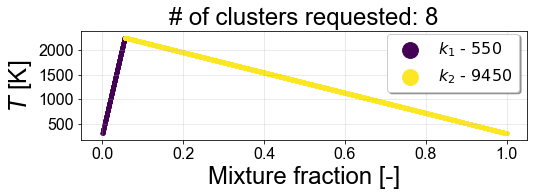

In [7]:
for n_clusters in range(2,9):

    idx_filename = 'idx-BS-VQPCA-' + idx0name + '-scaling-pareto-q' + str(n_components) + '-k' + str(n_clusters)
    BS_idx = pd.read_csv('../results/idx-BS/' + idx_filename + '.csv', sep = ',', header=None).to_numpy().ravel()-1
    
    plt_BS = preprocess.plot_2d_clustering(BS_Z,
                                           BS_state_space[:,0],
                                           BS_idx,
                                           x_label='Mixture fraction [-]',
                                           y_label='$T$ [K]',
                                           color_map='viridis',
                                           first_cluster_index_zero=False,
                                           grid_on=True,
                                           title='# of clusters requested: ' + str(n_clusters),
                                           figure_size=(8,2))

***